<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/11_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self Organizing MAP
Using the Iris dataset, map the three species onto the SOM (Self-Organizing Map). Verify that clusters are formed within the 2D map.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [3]:

class SOM:
    def __init__(self, x, y, input_dim, lr=0.5, sigma=None, epochs=100):
        self.x = x  # Width of the SOM grid
        self.y = y  # Height of the SOM grid
        self.input_dim = input_dim  # Dimensionality of the input data
        self.lr = lr  # Learning rate
        self.sigma = sigma if sigma else max(x, y) / 2  # Initial neighborhood radius
        self.epochs = epochs  # Number of iterations
        self.weights = np.random.rand(x, y, input_dim)  # Initialize weights randomly

    def _euclidean_distance(self, a, b):
        return np.linalg.norm(a - b)

    def _find_bmu(self, sample):
        distances = np.linalg.norm(self.weights - sample, axis=2)
        bmu_idx = np.unravel_index(np.argmin(distances), distances.shape)
        return bmu_idx

    def _update_weights(self, sample, bmu_idx, iteration):
        lr_decay = self.lr * (1 - iteration / self.epochs)
        sigma_decay = self.sigma * (1 - iteration / self.epochs)

        for i in range(self.x):
            for j in range(self.y):
                neuron_distance = self._euclidean_distance(np.array([i, j]), np.array(bmu_idx))
                if neuron_distance < sigma_decay:
                    influence = np.exp(-neuron_distance**2 / (2 * sigma_decay**2))
                    self.weights[i, j] += lr_decay * influence * (sample - self.weights[i, j])

    def train(self, data):
        for iteration in range(self.epochs):
            sample = data[np.random.randint(0, data.shape[0])]
            bmu_idx = self._find_bmu(sample)
            self._update_weights(sample, bmu_idx, iteration)

    def map(self, data):
        mapping = []
        for sample in data:
            bmu_idx = self._find_bmu(sample)
            mapping.append(bmu_idx)
        return np.array(mapping)

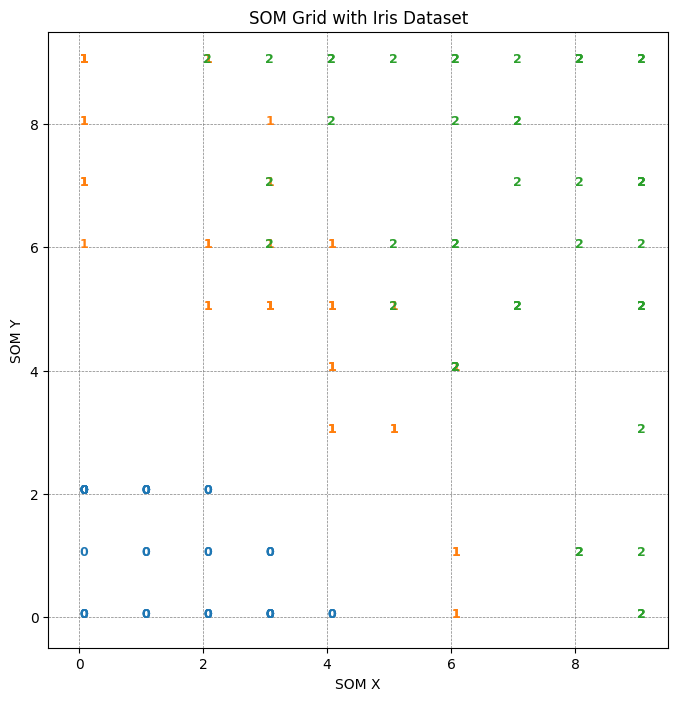

In [2]:
# Load the Iris dataset
iris = load_iris()
data = iris.data  # Use the 4-dimensional features
labels = iris.target  # Ground truth labels

# Normalize the data
data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

# Initialize and train the SOM
som = SOM(x=10, y=10, input_dim=4, lr=0.5, epochs=100)
som.train(data)

# Map the data onto the SOM grid
mapped = som.map(data)

# Plot the SOM grid with data points
plt.figure(figsize=(8, 8))
for idx, (x, y) in enumerate(mapped):
    plt.text(x, y, str(labels[idx]), color=plt.cm.tab10(labels[idx] / 10),
             fontdict={'weight': 'bold', 'size': 9})
plt.xlim(-0.5, som.x - 0.5)
plt.ylim(-0.5, som.y - 0.5)
plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
plt.title("SOM Grid with Iris Dataset")
plt.xlabel("SOM X")
plt.ylabel("SOM Y")
plt.show()
